In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img
%matplotlib inline

Datos obtenidos de:

https://www.kaggle.com/datasets/jangedoo/utkface-new


https://www.kaggle.com/datasets/prasunroy/natural-images


https://www.kaggle.com/datasets/kkhandekar/popular-brand-logos-image-dataset?select=Logos

Se usara un red convolucional

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

Obtenemos los nombres de las fotos para poder tranformalos a arrays

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import shutil
from pathlib import Path

path = Path("./archive/UTKFace/")
#path = Path('./archive/decte/1/')
filenames = list(map(lambda x: x.name, path.glob('*g')))

path2 = Path("./archive/noHuman/")
#path2 = Path('./archive/decte/0/')
filenames2 = list(map(lambda x: x.name, path2.glob('*g')))


Tranformamos todas las imagenes a np.arrays y tambien las etiquetas 0 para personas y 1 para las que no son

In [5]:
np.random.seed(123)
np.random.shuffle(filenames)
labels = []
data = []
for filename in filenames:
    img = load_img("./archive/UTKFace/"+filename)
    #img = load_img("./archive/decte/1/"+filename)
    #temp = filename.split('_')
    labels.append(int(1))#int(temp[1]))
    img = img.resize((73,73))
    img = np.array(img)
    data.append(img)
    #break
np.random.shuffle(filenames2)
for filename in filenames2:
    img = load_img("./archive/noHuman/"+filename)
    #img = load_img("./archive/decte/0/"+filename)
    labels.append(int(0))
    img = img.resize((73,73))
    img = np.array(img)
    data.append(img)
    #break

data = np.array(data)
gender_labels = np.array(labels)

c:\Users\monch\anaconda3\envs\person_detection\lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [6]:
print(data.shape)
print(gender_labels.shape)


(36011, 73, 73, 3)
(36011,)


Dividimos nuestros datos en 15% de prueba

In [7]:
from sklearn.utils import shuffle

In [8]:
new_X, new_y = shuffle(data, gender_labels,random_state=123)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.1, random_state=13)
#X_train, X_test, y_train, y_test = train_test_split(data, gender_labels, test_size=0.15, random_state=123)

1


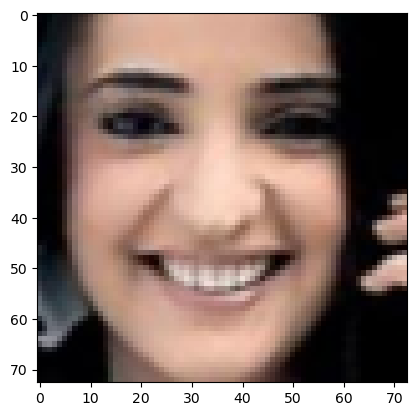

In [10]:
i = 6
img = X_train[i]
plt.imshow(img, interpolation='nearest')
print(y_train[i])
plt.show()


Definimos un modelo con keras con entrada de 73x73 como vienen de twitter

In [11]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(64, 3, padding='same',activation='relu',input_shape=(73, 73, 3)),
  tf.keras.layers.Conv2D(64, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3,padding='same', activation='relu'),
  tf.keras.layers.Conv2D(64, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3,padding='same', activation='relu'),
  tf.keras.layers.Conv2D(64, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3,padding='same', activation='relu'),
  tf.keras.layers.Conv2D(64, 3,padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation= 'sigmoid')
])

In [12]:
opti = tf.keras.optimizers.Adam(learning_rate=0.00003) # =0.00003
model.compile( optimizer= opti,loss='binary_crossentropy', metrics=['accuracy'])

se entrena el modelo, con 5 epocas es mas que suficiente

In [13]:
epochs=10
#362
history = model.fit(x=X_train, y=y_train, batch_size = 32,epochs=epochs,validation_data=(X_test,y_test))

Epoch 1/10
1012/1012 [==============================] - 64s 53ms/step - loss: 0.2454 - accuracy: 0.8881 - val_loss: 0.1669 - val_accuracy: 0.9146
Epoch 2/10
1012/1012 [==============================] - 50s 50ms/step - loss: 0.1622 - accuracy: 0.9259 - val_loss: 0.1332 - val_accuracy: 0.9394
Epoch 3/10
1012/1012 [==============================] - 50s 50ms/step - loss: 0.1395 - accuracy: 0.9361 - val_loss: 0.1207 - val_accuracy: 0.9435
Epoch 4/10
1012/1012 [==============================] - 51s 50ms/step - loss: 0.1261 - accuracy: 0.9444 - val_loss: 0.1103 - val_accuracy: 0.9494
Epoch 5/10
1012/1012 [==============================] - 51s 50ms/step - loss: 0.1129 - accuracy: 0.9488 - val_loss: 0.1004 - val_accuracy: 0.9544
Epoch 6/10
1012/1012 [==============================] - 49s 49ms/step - loss: 0.1031 - accuracy: 0.9539 - val_loss: 0.1106 - val_accuracy: 0.9497
Epoch 7/10
1012/1012 [==============================] - 51s 50ms/step - loss: 0.0934 - accuracy: 0.9581 - val_loss: 0.0969 -

In [11]:
def graficar(history,epochs):
  '''
  Graficamos la presicion en entrenamiento contra la validacion tambien con la perdida
  
  '''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)
  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Precisión en el entrenamiento')
  plt.plot(epochs_range, val_acc, label='Precisión en la validación')
  plt.legend(loc='lower right')
  plt.title('Precisión de los conjuntos')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Error en el entrenamiento')
  plt.plot(epochs_range, val_loss, label='Error en la validación')
  plt.legend(loc='upper right')
  plt.title('Error de los conjuntos')
  plt.show()
#graficar(history,epochs)

Como nuestra propia red no da los resultados esperados usaremos otra ya pre-entrenada

En este caso usamos VGG16 una red con una arquitectura ya definida y pre-entrenada con el dataset imagenet

https://arxiv.org/abs/1409.1556

usando Keras:

https://keras.io/api/applications/vgg/

In [27]:
from tensorflow.keras.applications import VGG16
epochs = 10
m =  VGG16(
        input_shape = (73,73,3),
          include_top = False,
          weights = 'imagenet')

        
x = keras.layers.Flatten()(m.output)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(1, activation = "sigmoid")(x)

for layers in m.layers:
    layers.trainable = False
m = keras.Model(m.input, x)
m.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")  
hist = m.fit(x=X_train, y=y_train, batch_size = 16,epochs=epochs,validation_data=(X_test,y_test))

Epoch 1/10
2026/2026 [==============================] - 72s 35ms/step - loss: 0.4578 - accuracy: 0.9599 - val_loss: 0.3437 - val_accuracy: 0.9714
Epoch 2/10
2026/2026 [==============================] - 70s 34ms/step - loss: 0.3511 - accuracy: 0.9718 - val_loss: 0.4184 - val_accuracy: 0.9703
Epoch 3/10
2026/2026 [==============================] - 70s 34ms/step - loss: 0.3381 - accuracy: 0.9736 - val_loss: 0.4340 - val_accuracy: 0.9703
Epoch 4/10
2026/2026 [==============================] - 71s 35ms/step - loss: 0.3038 - accuracy: 0.9751 - val_loss: 0.5055 - val_accuracy: 0.9717
Epoch 5/10
2026/2026 [==============================] - 72s 35ms/step - loss: 0.3218 - accuracy: 0.9768 - val_loss: 0.4810 - val_accuracy: 0.9700
Epoch 6/10
2026/2026 [==============================] - 69s 34ms/step - loss: 0.3238 - accuracy: 0.9767 - val_loss: 0.5594 - val_accuracy: 0.9720
Epoch 7/10
2026/2026 [==============================] - 71s 35ms/step - loss: 0.3314 - accuracy: 0.9777 - val_loss: 0.4266 -

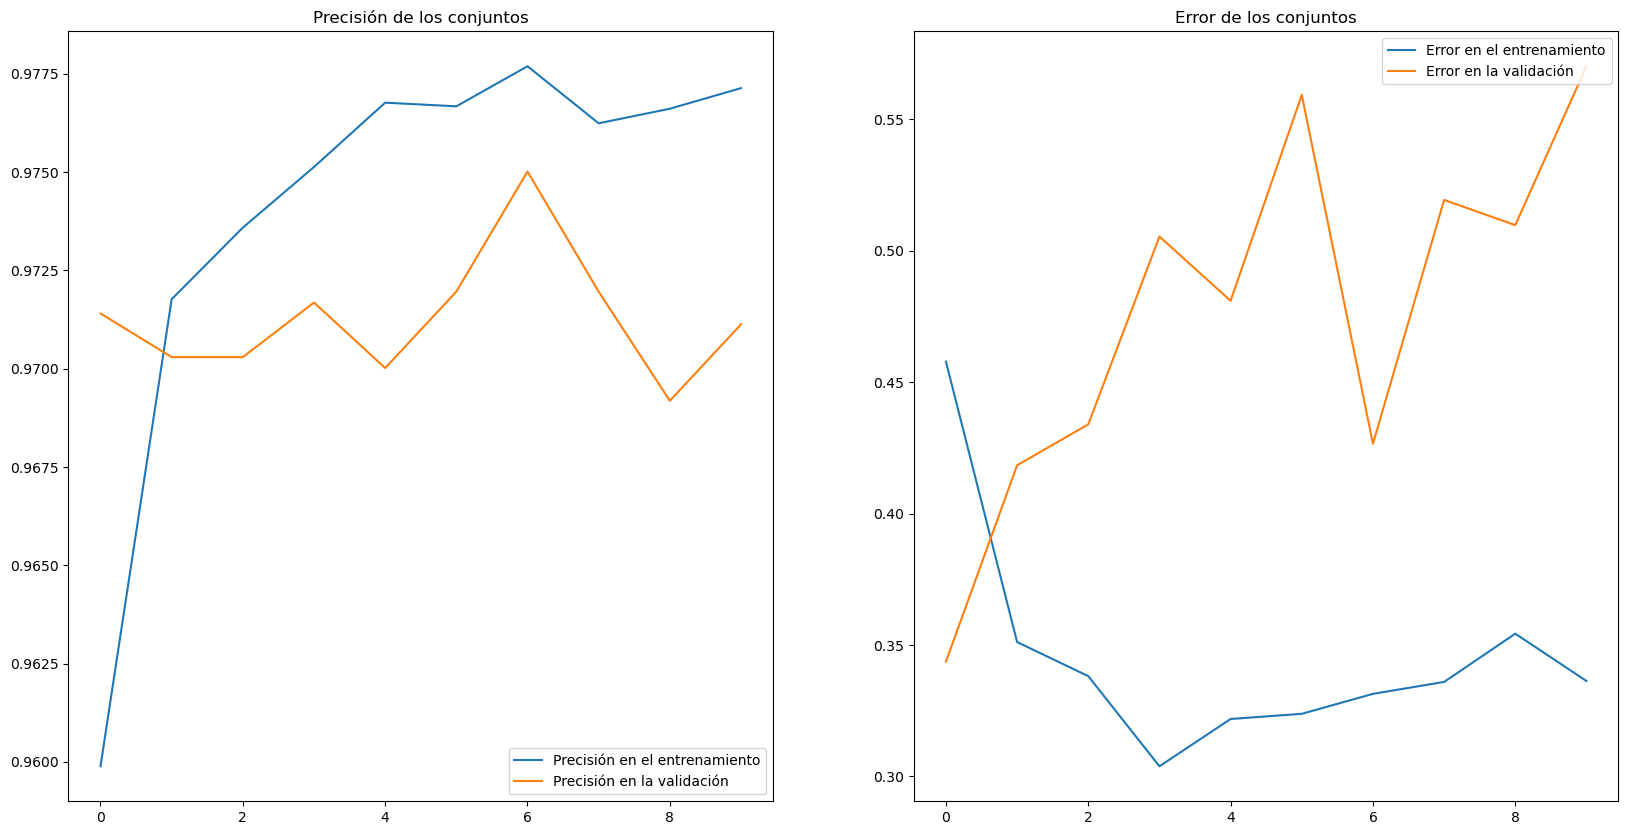

In [28]:
graficar(hist,epochs)

Guardamos el modelo ya entrenado para usarlo con las imagenes de twitter

In [14]:
import os.path
if os.path.isfile('./models/modelo_vgg98.h5') is False:
    m.save('./models/modelo_vgg98.h5')

cargamos el modelo, para probarlo

In [17]:
from tensorflow.keras.models import load_model

mo = load_model("./models/modelo_persona.h5")


In [18]:
prueba = load_img("./imagenesRandom/447849720.png")#load_img("./imagenesRandom/1333838577692774400.png")
prueba = prueba.resize((73,73))
prueba = np.array(prueba)
prueba = np.array([prueba])

FileNotFoundError: [Errno 2] No such file or directory: './imagenesRandom/447849720.png'